<a href="https://colab.research.google.com/github/JayrajRadadiya/Capstone-Project/blob/main/Code/Python%20Codes/Capstone_ML_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone ML Models

In [ ]:
#Importing Libraries and Autheticating
import pandas as pd
import numpy as np
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas_gbq

Demographics= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Demographics`',project_id='surveyproject-378222', dialect='standard') 
Accommodation = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Accommodation`',project_id='surveyproject-378222', dialect='standard')
Accommodation_feedback=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Accommodation_feedback`',project_id='surveyproject-378222', dialect='standard')
Academic = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Academic`',project_id='surveyproject-378222', dialect='standard')
Academic_feedback=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Academic_feedback`',project_id='surveyproject-378222', dialect='standard')
Services = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Services`',project_id='surveyproject-378222', dialect='standard')
Feedback= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Feedback`',project_id='surveyproject-378222', dialect='standard') 
Base_Survey_Table= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Base_Survey_Table`',project_id='surveyproject-378222', dialect='standard') 

Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|


In [ ]:
acf = Accommodation_feedback.copy()
label_map = {'\xa0Dissatisfied': 2, 'Neutral': 3, 'Highly Dissatisfied': 1, 'Satisfied': 4, 'Highly Satisfied': 5}
cols_to_map = ['Accm_finding_score', 'Accm_Quality_Score', 'Accm_affordibility_score','Commute_score','Needs_Availibility_Score']
acf[cols_to_map] = acf[cols_to_map].applymap(label_map.get)
weights = {'A': 0.20, 'B': 0.20, 'C': 0.20, 'D': 0.20, 'E': 0.20}
acf['Acc_score'] = ((acf['Accm_finding_score']*weights['A']) + (acf['Accm_Quality_Score']*weights['B']) + (acf['Accm_affordibility_score']*weights['C'])+ (acf['Commute_score']*weights['D']) + (acf['Needs_Availibility_Score']*weights['E']))
acf['Scaled_Acc_score']=acf['Acc_score']/5
acc_Score =acf[['ID','Acc_score']]
s_acc_Score =acf[['ID','Scaled_Acc_score']]
acf.head()

,ID,Accm_finding_score,Accm_Quality_Score,Accm_affordibility_score,Commute_score,Needs_Availibility_Score,Acc_score,Scaled_Acc_score
0,88,3,3,3,4,3,3.2,0.64
1,229,3,3,3,3,3,3.0,0.60
2,301,3,3,3,3,3,3.0,0.60
3,183,3,3,3,3,3,3.0,0.60
4,195,3,3,3,4,3,3.2,0.64


In [ ]:
af=Academic_feedback.copy()
weights = {'A': 0.25, 'B': 0.25, 'C': 0.0, 'D': 0.25, 'E': 0.25}
af['Acd_score'] = ((af['Timetable_Schedules_score']*weights['A']) + (af['Section_Allocation_score']*weights['B']) + (af['Class_Hours_Score']*weights['C'])+ (af['Course_Contents_Score']*weights['D']) + (af['Afterclass_Workload_score']*weights['E']))
af['Scaled_Acd_score']=af['Acd_score']/5
acd_score =af[['ID','Acd_score']]
s_acd_score =af[['ID','Scaled_Acd_score']]
af.head()

,ID,Timetable_Schedules_score,Section_Allocation_score,Class_Hours_Score,Course_Contents_Score,Afterclass_Workload_score,Acd_score,Scaled_Acd_score
0,81,1,1,1,1,1,1.0,0.2
1,290,1,4,4,4,1,2.5,0.5
2,162,1,5,2,4,1,2.75,0.55
3,253,1,2,2,1,1,1.25,0.25
4,116,1,1,1,1,1,1.0,0.2


## Method 1 : Label Encoding

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Demographics 2
d2=Demographics[["ID","Education_lvl","Majors"]]
#Demographics 3
d3=Demographics[["ID","Work_exp","Yrs_exp","Field_of_exp"]]
#Demographics 4
d4=Demographics[["ID","Age","Gender"]]

#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mapping_m = {"Other": 0, "Science": 1, "Engineering": 2,"Commerce/Accounting": 3,"Mathematics/Statistics": 4, "Business/Administration": 5,"Technology (Computer Science/Information Technology)": 6}
mapping_ed = {"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)": 0, 'Post Graduate Diploma': 1, "Master's degree (MCA, MBA, M.Tech, MSc...)": 2,"Doctorate (PhD, M.Phil)": 3}
mapping_yrs = { "2 - 5 Years": 1, "6 - 10 Years": 2,"10 - 15 Years": 3,"0 - 1 Years": 0, "15 + Years": 4}
mapping_gender = {"Prefer not to say": 0, 'Male\xa0': 1, "Female": 2}
mapping_age = {"18-25":0, "26-35":1, "36-45": 2,"45 and above": 3}

d2['Enc_Edcucation_lvl'] = d2['Education_lvl'].map(mapping_ed)
d2['Enc_Majors'] = d2['Majors'].map(mapping_m)
d3['Enc_Yrs_exp'] = d3['Yrs_exp'].map(mapping_yrs)
d4['Enc_Age'] = d4['Age'].map(mapping_age)
d4['Enc_Gender'] = d4['Gender'].map(mapping_gender)

d3["Enc_Yrs_exp"]=d3["Enc_Yrs_exp"].replace(np.nan,0)

demo1= pd.merge(d2, d3, on='ID')
demo1 = pd.merge(demo1, d4, on='ID')

demo1=demo1.drop(["Education_lvl","Majors","Work_exp","Yrs_exp","Field_of_exp","Age","Gender"],axis=1)
demo1 = demo1.astype(int)
demo1

,ID,Enc_Edcucation_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender
0,119,0,0,0,0,1
1,174,0,0,1,1,2
2,168,1,0,1,1,1
3,103,0,0,1,1,2
4,8,0,0,2,1,1
...,...,...,...,...,...,...
295,266,2,6,2,1,2
296,179,2,6,2,1,1
297,211,0,6,2,1,2
298,11,2,6,3,1,1


## Method 2 - One-hot Encoding

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#Demographics 2
d2=Demographics[["ID","Education_lvl","Majors"]]
#Demographics 3
d3=Demographics[["ID","Work_exp","Yrs_exp","Field_of_exp"]]
#Demographics 4
d4=Demographics[["ID","Age","Gender"]]

# One hot Encoding using get dummies
oh_ed_lvl = pd.get_dummies(d2['Education_lvl'])
d2 = pd.concat([d2, oh_ed_lvl] ,axis=1)
oh_major = pd.get_dummies(d2['Majors'])
d2 = pd.concat([d2, oh_major], axis=1)

oh_yrs_exp = pd.get_dummies(d3['Yrs_exp'])
d3 = pd.concat([d3, oh_yrs_exp], axis=1)

oh_gn = pd.get_dummies(d4['Gender'])
d4 = pd.concat([d4, oh_gn], axis=1)
oh_Age= pd.get_dummies(d4['Age'])
d4 = pd.concat([d4, oh_Age], axis=1)

demo2= pd.merge(d2, d3, on='ID')
demo2 = pd.merge(demo2, d4, on='ID')

demo2=demo2.drop(["Education_lvl","Majors","Work_exp","Yrs_exp","Field_of_exp","Age","Gender"],axis=1)
demo2 = demo2.astype(int)
demo2

,ID,"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)","Doctorate (PhD, M.Phil)","Master's degree (MCA, MBA, M.Tech, MSc...)",Post Graduate Diploma,Business/Administration,Commerce/Accounting,Engineering,Mathematics/Statistics,Other,...,2 - 5 Years,6 - 10 Years,None,Female,Male,Prefer not to say,18-25,26-35,36-45,45 and above
0,119,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
1,174,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
2,168,0,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
3,103,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
4,8,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,266,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
296,179,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
297,211,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
298,11,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


# Final DFs

In [ ]:
# df1 -> Mixed Encoding
df1= pd.merge(demo1, acc_Score, on='ID')
df1 = pd.merge(df1, acd_score, on='ID')
df1['Acd_score']=df1['Acd_score']
df1['Acc_score']=df1['Acc_score']
df1

,ID,Enc_Edcucation_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender,Acc_score,Acd_score
0,119,0,0,0,0,1,4.6,3.0
1,174,0,0,1,1,2,3.4,3.5
2,168,1,0,1,1,1,3.4,2.5
3,103,0,0,1,1,2,3.4,3.5
4,8,0,0,2,1,1,4.0,2.75
...,...,...,...,...,...,...,...,...
295,266,2,6,2,1,2,4.6,3.25
296,179,2,6,2,1,1,3.2,2.75
297,211,0,6,2,1,2,3.0,5.0
298,11,2,6,3,1,1,4.0,4.25


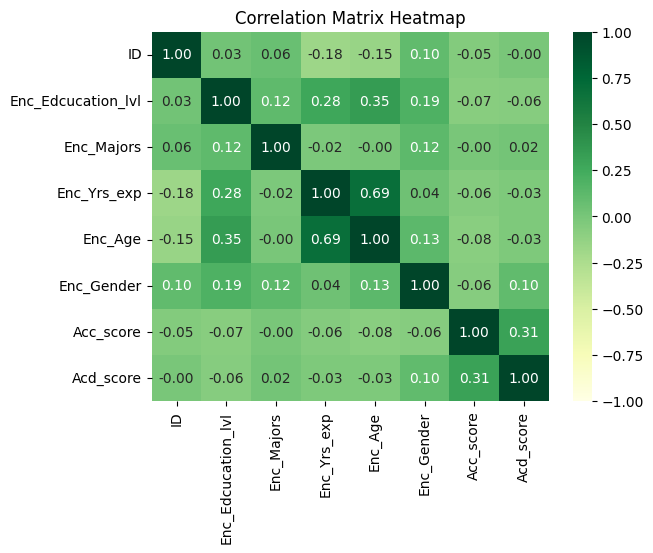

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate correlation matrix
corr_matrix = df1.corr()

# Create heatmap
sns.heatmap(corr_matrix, cmap="YlGn", annot=True, fmt='.2f', vmin=-1, vmax=1, center=0)

# Set plot properties
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

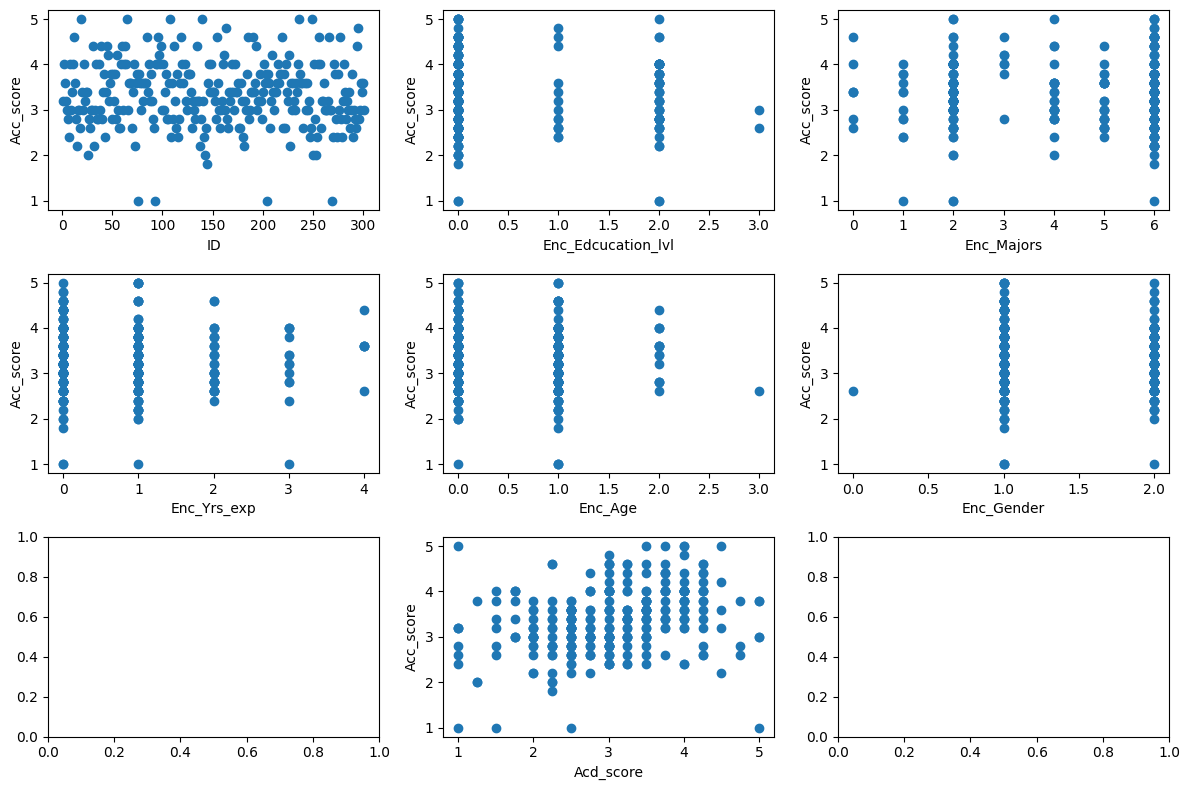

In [ ]:
import matplotlib.pyplot as plt

# Set the target column
target_col = "Acc_score"

# Determine the number of rows and columns for the grid
num_cols = 3
num_rows = (len(df1.columns) - 1) // num_cols + 1

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Loop over each feature column and create a scatter plot in the corresponding subplot
for i, col in enumerate(df1.columns):
    if col != target_col:
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axes[row_idx, col_idx]
        ax.scatter(df1[col], df1[target_col])
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)

# Adjust the spacing and layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
#df2 -> One Hot Encoding
df2= pd.merge(demo2, s_acc_Score, on='ID')
df2 = pd.merge(df2, s_acd_score, on='ID')
df2['Scaled_Acd_score']=df2['Scaled_Acd_score']
df2['Scaled_Acc_score']=df2['Scaled_Acc_score']
df2

,ID,"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)","Doctorate (PhD, M.Phil)","Master's degree (MCA, MBA, M.Tech, MSc...)",Post Graduate Diploma,Business/Administration,Commerce/Accounting,Engineering,Mathematics/Statistics,Other,...,None,Female,Male,Prefer not to say,18-25,26-35,36-45,45 and above,Scaled_Acc_score,Scaled_Acd_score
0,119,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0.92,0.6
1,174,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0.68,0.7
2,168,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0.68,0.5
3,103,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0.68,0.7
4,8,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0.80,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,266,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0.92,0.65
296,179,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0.64,0.55
297,211,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0.60,1.0
298,11,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0.80,0.85


In [ ]:
df2.corr()

,ID,"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)","Doctorate (PhD, M.Phil)","Master's degree (MCA, MBA, M.Tech, MSc...)",Post Graduate Diploma,Business/Administration,Commerce/Accounting,Engineering,Mathematics/Statistics,Other,...,None,Female,Male,Prefer not to say,18-25,26-35,36-45,45 and above,Scaled_Acc_score,Scaled_Acd_score
ID,1.000000,0.001188,0.055917,0.037618,-0.090914,-0.005346,-0.003279,-0.050737,0.011908,-0.108753,...,0.101997,0.105383,-0.105728,0.004194,0.147859,-0.109558,-0.088637,-0.005126,-0.050030,-0.001958
"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)",0.001188,1.000000,-0.152773,-0.843968,-0.412593,-0.372900,-0.182205,0.228795,-0.018881,-0.023151,...,0.178791,-0.203250,0.215652,-0.107846,0.342569,-0.274035,-0.134039,-0.107846,0.071063,0.064270
"Doctorate (PhD, M.Phil)",0.055917,-0.152773,1.000000,-0.037076,-0.018125,0.126829,-0.012663,0.035754,-0.024158,-0.012663,...,0.114993,0.017304,-0.100335,0.705923,-0.084138,0.093683,-0.018794,-0.004738,-0.064010,-0.013202
"Master's degree (MCA, MBA, M.Tech, MSc...)",0.037618,-0.843968,-0.037076,1.000000,-0.100131,0.291770,0.165181,-0.199454,0.062803,-0.069952,...,-0.172194,0.213501,-0.210120,-0.026173,-0.287262,0.213102,0.140471,0.127785,-0.043492,-0.058716
Post Graduate Diploma,-0.090914,-0.412593,-0.018125,-0.100131,1.000000,0.167767,0.070489,-0.110355,-0.065243,0.175176,...,-0.090738,0.014429,-0.012903,-0.012795,-0.132375,0.125441,0.021753,-0.012795,-0.038166,-0.017244
Business/Administration,-0.005346,-0.372900,0.126829,0.291770,0.167767,1.000000,-0.045579,-0.193047,-0.086957,-0.045579,...,-0.132080,0.037171,-0.035113,-0.017054,-0.204526,0.138852,0.101477,0.196116,-0.059347,-0.079724
Commerce/Accounting,-0.003279,-0.182205,-0.012663,0.165181,0.070489,-0.045579,1.000000,-0.101187,-0.045579,-0.023891,...,-0.063391,0.100353,-0.099159,-0.008939,-0.114567,0.043074,0.167168,-0.008939,0.130180,0.087628
Engineering,-0.050737,0.228795,0.035754,-0.199454,-0.110355,-0.193047,-0.101187,1.000000,-0.193047,-0.101187,...,-0.035402,-0.173966,0.163326,0.088339,0.098961,-0.058716,-0.083438,-0.037860,0.021700,-0.058891
Mathematics/Statistics,0.011908,-0.018881,-0.024158,0.062803,-0.065243,-0.086957,-0.045579,-0.193047,1.000000,-0.045579,...,0.023920,0.087403,-0.085273,-0.017054,0.090463,-0.059508,-0.067651,-0.017054,-0.013964,-0.026050
Other,-0.108753,-0.023151,-0.012663,-0.069952,0.175176,-0.045579,-0.023891,-0.101187,-0.045579,1.000000,...,-0.063391,0.010080,-0.009014,-0.008939,-0.114567,0.132194,-0.035460,-0.008939,0.023526,0.036183


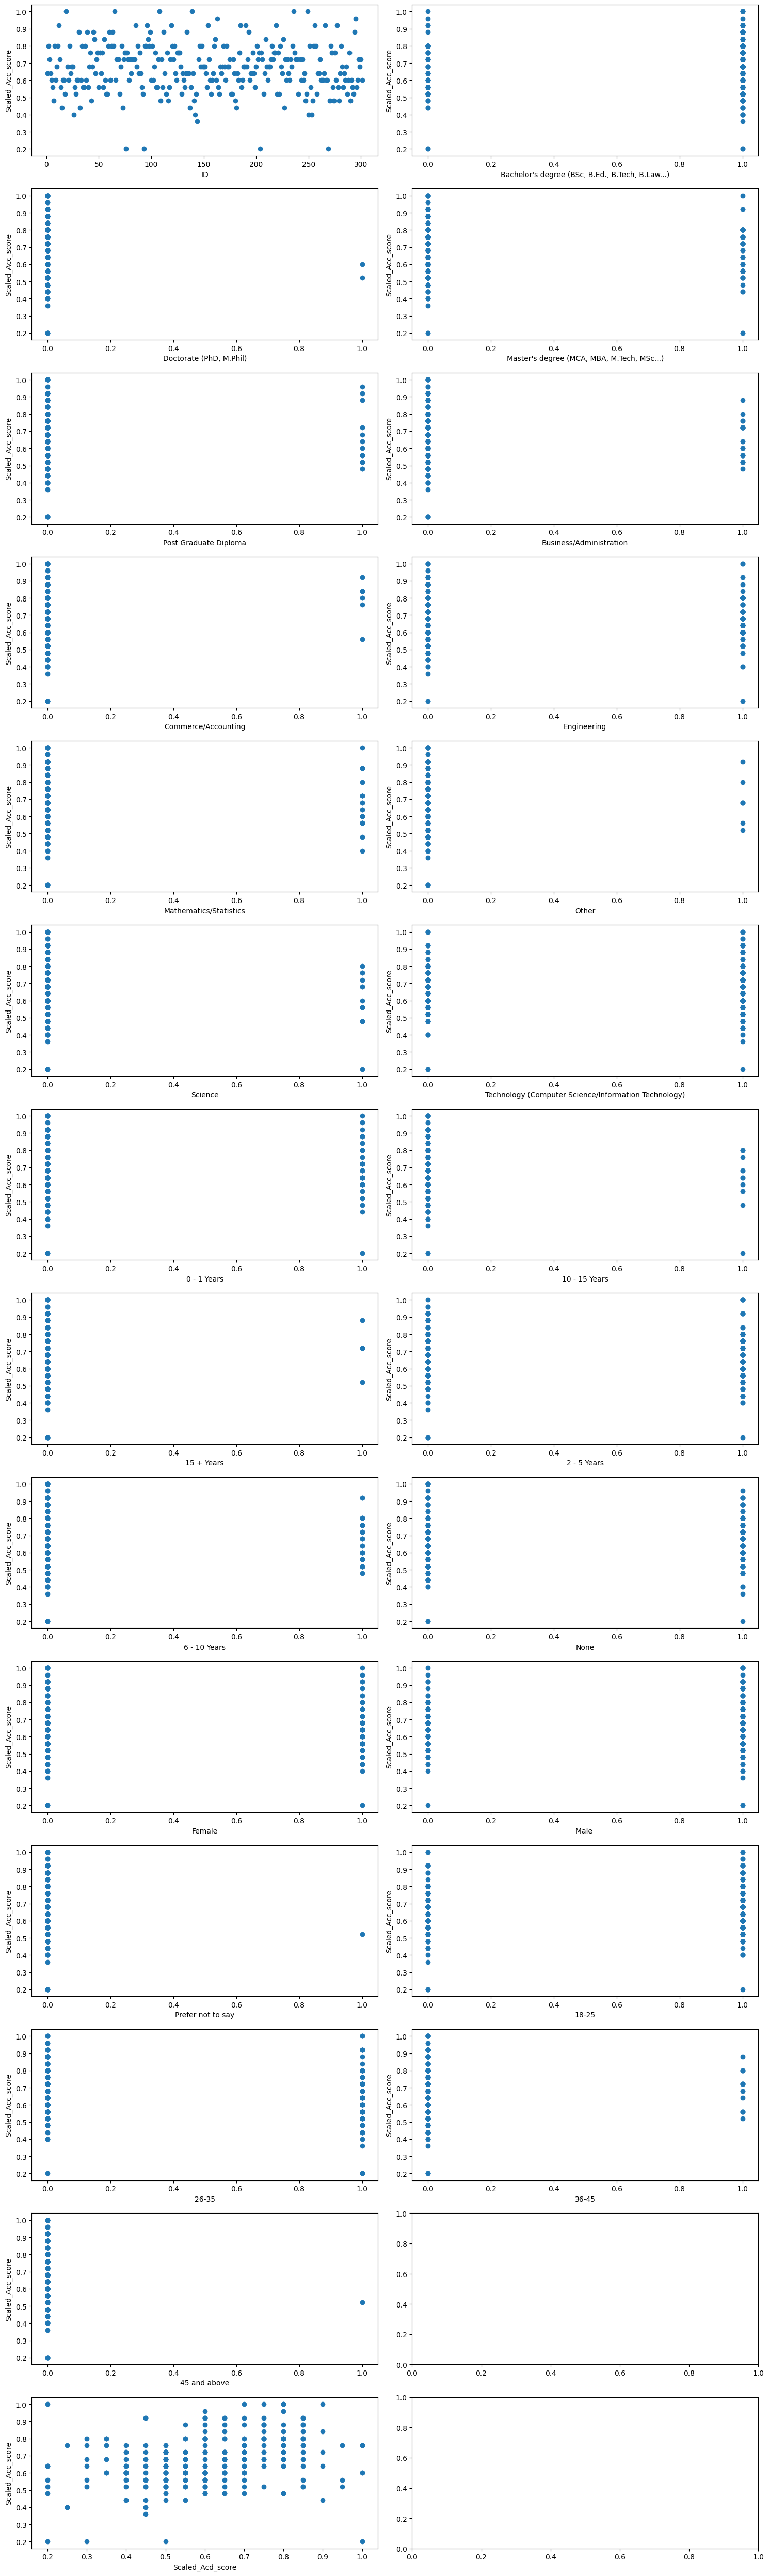

In [ ]:
import matplotlib.pyplot as plt

# Set the target column
target_col = "Scaled_Acc_score"

# Determine the number of rows and columns for the grid
num_cols = 2
num_rows = (len(df2.columns) - 1) // num_cols + 1

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 50))

# Loop over each feature column and create a scatter plot in the corresponding subplot
for i, col in enumerate(df2.columns):
    if col != target_col:
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axes[row_idx, col_idx]
        ax.scatter(df2[col], df2[target_col])
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)

# Adjust the spacing and layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()

# ML on - Label Encoded Data 

## Train/Test Data 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  300 non-null    int64  
 1   Enc_Edcucation_lvl  300 non-null    int64  
 2   Enc_Majors          300 non-null    int64  
 3   Enc_Yrs_exp         300 non-null    int64  
 4   Enc_Age             300 non-null    int64  
 5   Enc_Gender          300 non-null    int64  
 6   Acc_score           300 non-null    float64
 7   Acd_score           300 non-null    Float64
dtypes: Float64(1), float64(1), int64(6)
memory usage: 21.4 KB


In [ ]:
X=df1.drop(['ID','Acc_score'],axis=1)
y=df1['Acc_score']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

## Decision Tree Regressor 

Best parameters: {'max_depth': 1, 'min_samples_leaf': 1}
Best mean squared error: 0.50767
Mean squared error: 0.29968
Mean absolute error: 0.43356
R-squared score: 0.09433


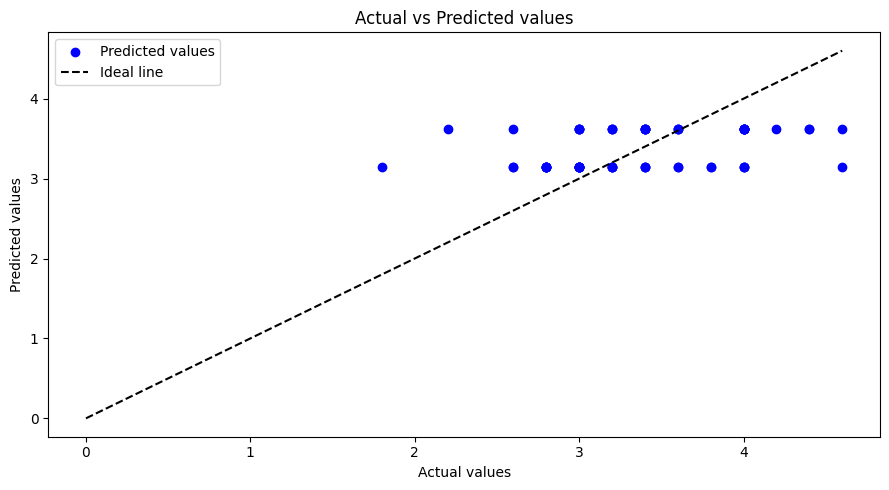

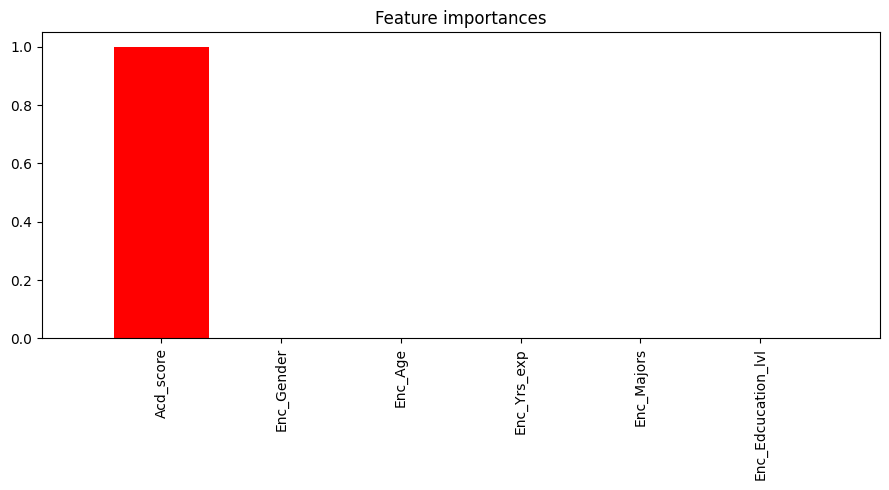

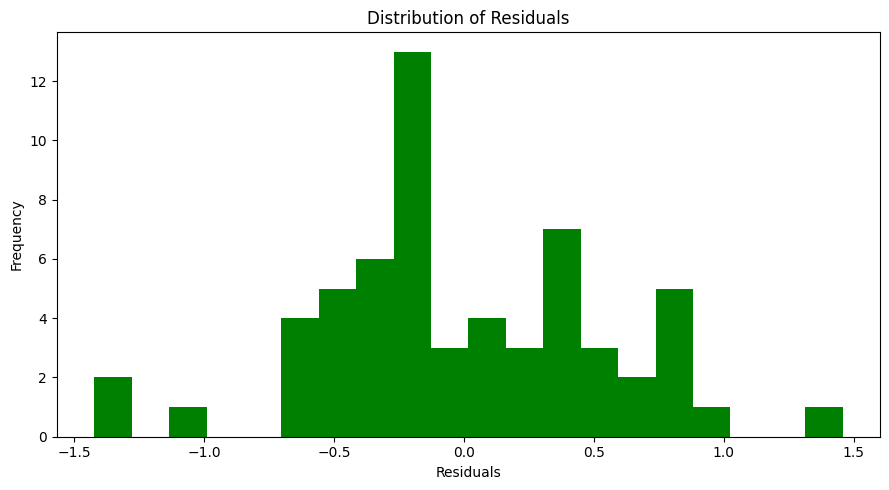

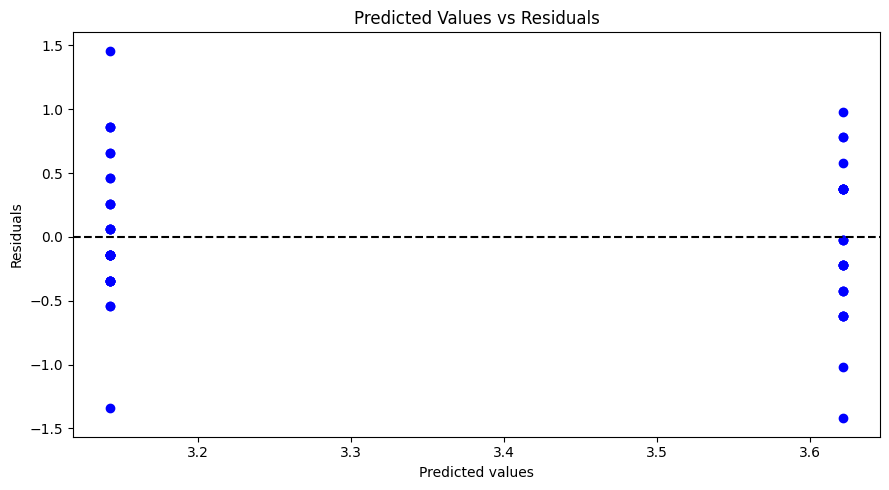

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)


# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")


# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_pred, color='b', label='Predicted values')
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], 'k--', label='Ideal line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.tight_layout()
plt.show()


print("==========================================================================================================================")
# Plot feature importance
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(9,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


print("==========================================================================================================================")
# Plot the distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=20, color='g')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()
print("==========================================================================================================================")
# Plot the predicted values against the residuals
plt.figure(figsize=(9,5))
plt.scatter(y_pred, residuals, color='b')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.tight_layout()
plt.show()
print("==========================================================================================================================")

## Support Vector Regressor

Best parameters: {'C': 100, 'gamma': 0.001}
Best mean squared error: 0.48824
Mean squared error: 0.33849
Mean absolute error: 0.45643
R-squared score: -0.02297


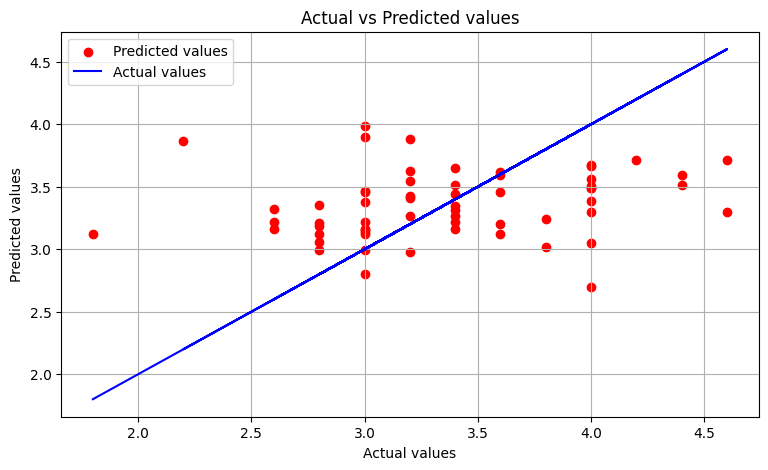

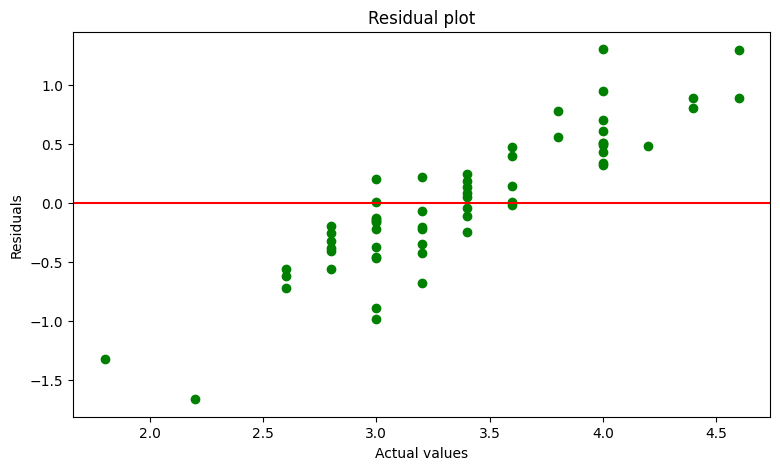

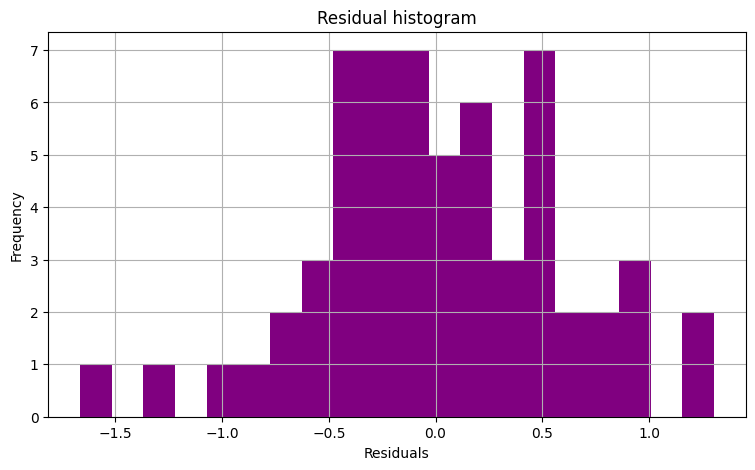

In [ ]:
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
param_grid = {
    'C': [0.01,0.1, 1, 10, 100],
    'gamma': [0.001,0.01, 0.1, 1, 'scale']
}
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)

# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")
# Plot the predicted values against the actual values
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(y_test, y_pred, c='red', label='Predicted values')
ax.plot(y_test, y_test, c='blue', label='Actual values')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.set_title('Actual vs Predicted values')
ax.legend()
ax.grid(True)
plt.show()
print("==========================================================================================================================")
# Plot the residuals
fig, ax = plt.subplots(figsize=(9,5))
residuals = y_test - y_pred
ax.scatter(y_test, residuals, c='green')
ax.axhline(y=0, color='red')
ax.set_xlabel('Actual values')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()
print("==========================================================================================================================")
# Plot a histogram of the residuals
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(residuals, bins=20, color='purple')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Residual histogram')
ax.grid(True)
plt.show()
print("==========================================================================================================================")

## Random Forest Regressor

Best hyperparameters: {'max_depth': 1, 'min_samples_leaf': 4, 'n_estimators': 150}
Best negative mean squared error: 0.48563


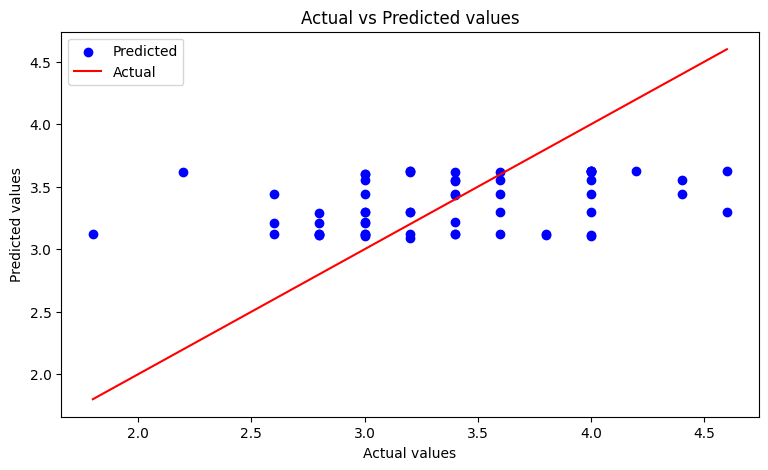

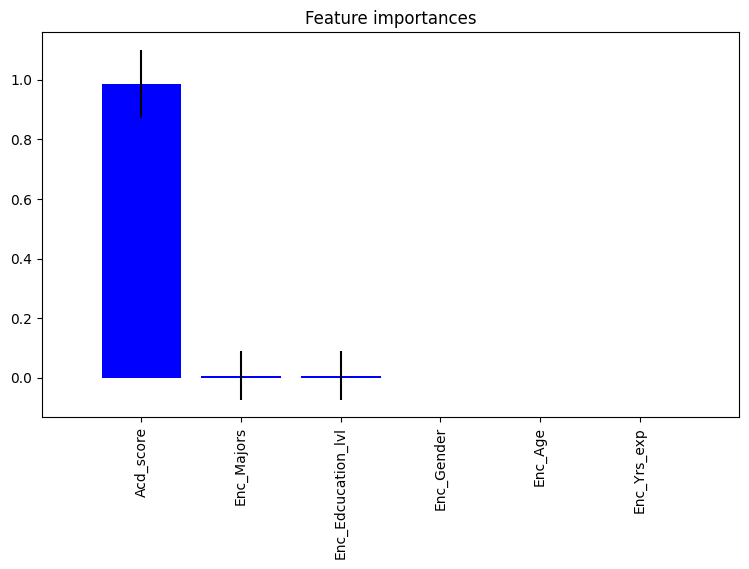

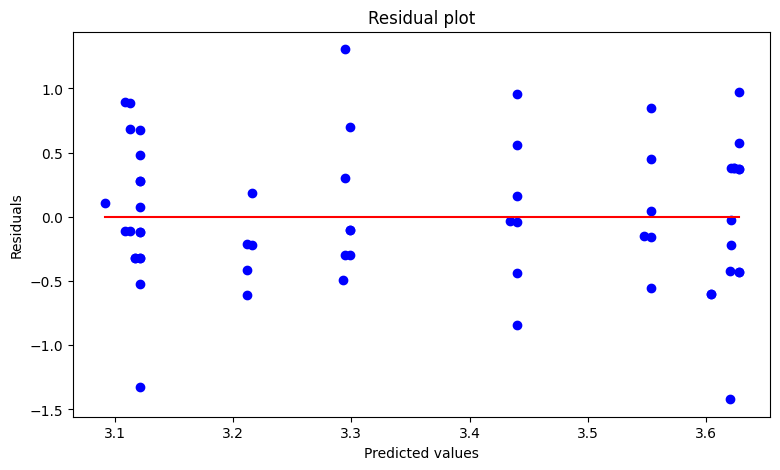

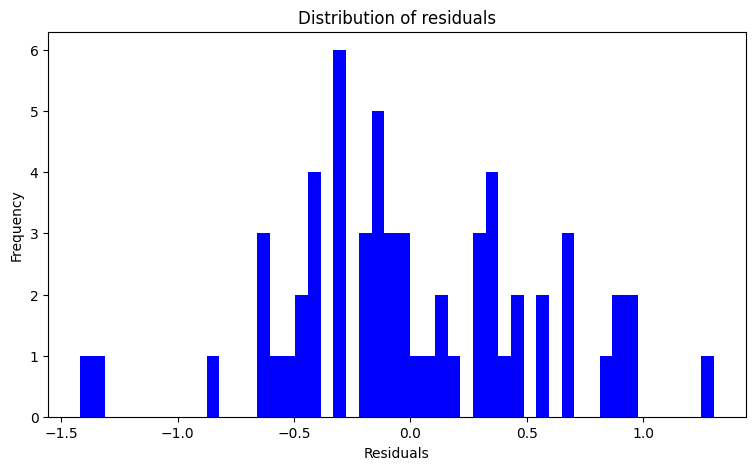

Mean squared error: 0.29235
Mean absolute error: 0.43298
R-squared score: 0.11646


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 250],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
rf_regressor = RandomForestRegressor()
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best hyperparameters: {}".format(grid_search.best_params_))
print("Best negative mean squared error: {:.5f}".format(-grid_search.best_score_))
y_predicted = grid_search.predict(X_test)

# Calculate the evaluation metrics between the predicted and actual target values
mean_squared_error_value = mean_squared_error(y_test, y_predicted)
mean_absolute_error_value = mean_absolute_error(y_test, y_predicted)
r2_score_value = r2_score(y_test, y_predicted)
print("==========================================================================================================================")
# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_predicted, color='b', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()
print("==========================================================================================================================")
# Plot feature importance
importances = grid_search.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in grid_search.best_estimator_.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(9,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()
print("==========================================================================================================================")
# Plot residuals
residuals = y_test - y_predicted
plt.figure(figsize=(9,5))
plt.scatter(y_predicted, residuals, color='b')
plt.plot([min(y_predicted), max(y_predicted)], [0, 0], color='r')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()
print("==========================================================================================================================")
# Plot distribution of residuals
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=50, color='b')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of residuals')
plt.show()
print("==========================================================================================================================")
print("Mean squared error: {:.5f}".format(mean_squared_error_value))
print("Mean absolute error: {:.5f}".format(mean_absolute_error_value))
print("R-squared score: {:.5f}".format(r2_score_value))


## Gradient Boosting Regressor

Best parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 50}
Best mean squared error: 0.54283
Mean squared error: 0.36021
Mean absolute error: 0.48435
R-squared score: -0.08861


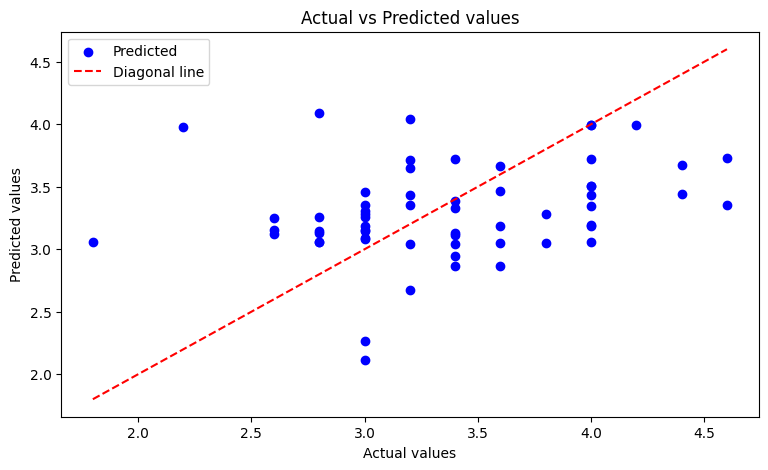

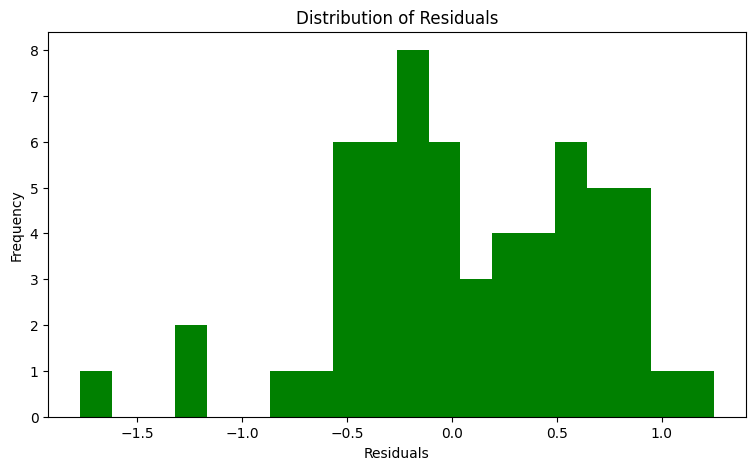

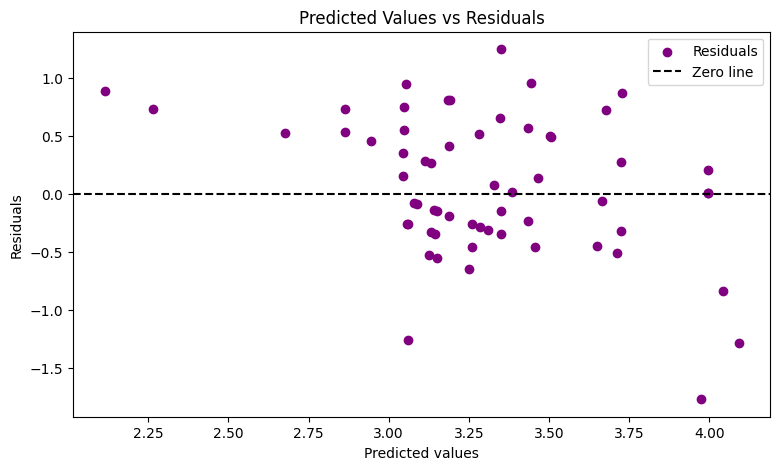

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
gb_reg = GradientBoostingRegressor()
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)

# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")
# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Diagonal line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()
print("==========================================================================================================================")
# Plot the distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=20, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()
print("==========================================================================================================================")
# Plot the predicted values against the residuals
plt.figure(figsize=(9,5))
plt.scatter(y_pred, residuals, color='purple', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero line')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.legend()
plt.show()
print("==========================================================================================================================")

## K-Neighbors Regressor

Best parameters: {'leaf_size': 6, 'n_neighbors': 13, 'weights': 'uniform'}
Best mean squared error: 0.49294
Mean squared error: 0.32005
R2 score: 0.03275


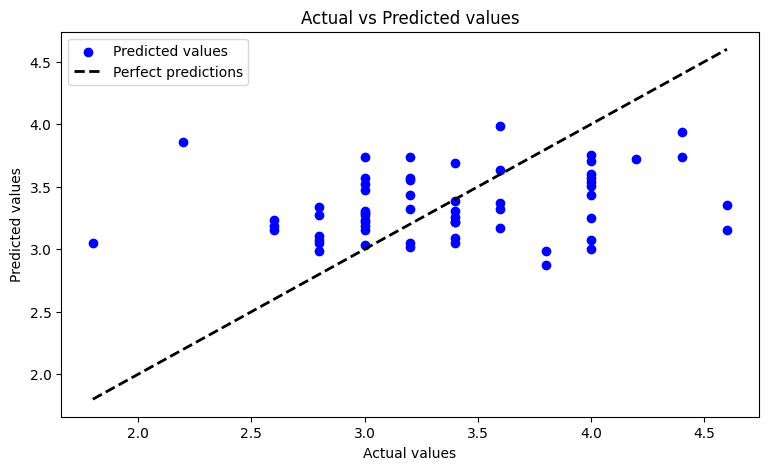

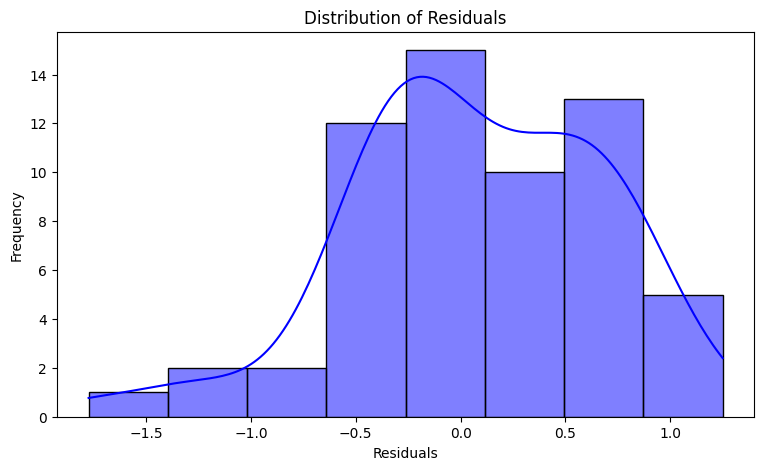

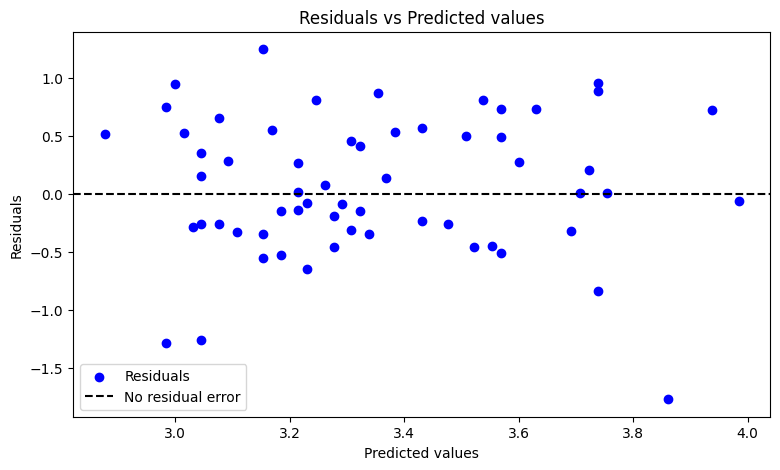

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
param_grid = {
    'n_neighbors': range(1, 50),
    'weights': ['uniform', 'distance'],
    'leaf_size': range(1,50)
}
knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("R2 score: {:.5f}".format(r2))
print("==========================================================================================================================")
# Plot the predicted values against the actual values
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(y_test, y_pred, color='blue', label='Predicted values')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.set_title('Actual vs Predicted values')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect predictions')
ax.legend()
plt.show()
print("==========================================================================================================================")
# Plot the distribution of the residuals
fig, ax = plt.subplots(figsize=(9,5))
sns.histplot(residuals, kde=True, color='blue')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Residuals')
plt.show()
print("==========================================================================================================================")
# Plot the residuals against the predicted values
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(y_pred, residuals, color='blue', label='Residuals')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Predicted values')
ax.axhline(y=0, color='k', linestyle='--', label='No residual error')
ax.legend()
plt.show()
print("==========================================================================================================================")

# ML on - One Hot Encoded Data 

## Train/Test Data  

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   ID                                                    300 non-null    int64  
 1   Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)      300 non-null    int64  
 2   Doctorate (PhD, M.Phil)                               300 non-null    int64  
 3   Master's degree (MCA, MBA, M.Tech, MSc...)            300 non-null    int64  
 4   Post Graduate Diploma                                 300 non-null    int64  
 5   Business/Administration                               300 non-null    int64  
 6   Commerce/Accounting                                   300 non-null    int64  
 7   Engineering                                           300 non-null    int64  
 8   Mathematics/Statistics                                300 no

In [ ]:
X=df2.drop(['ID','Scaled_Acc_score'],axis=1)
y=df2['Scaled_Acc_score']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

## Decision Tree Regressor 

Best parameters: {'max_depth': 2, 'min_samples_leaf': 5}
Best mean squared error: 0.02030
Mean squared error: 0.01162
Mean absolute error: 0.08489
R-squared score: 0.12199


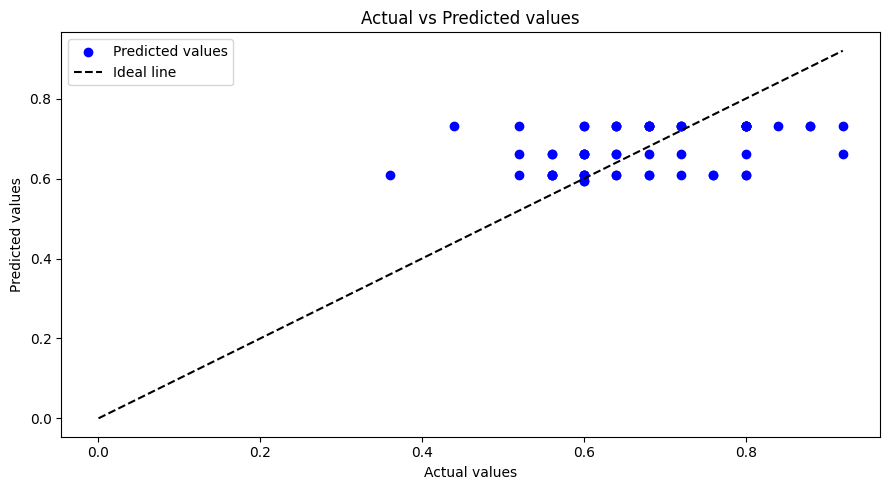

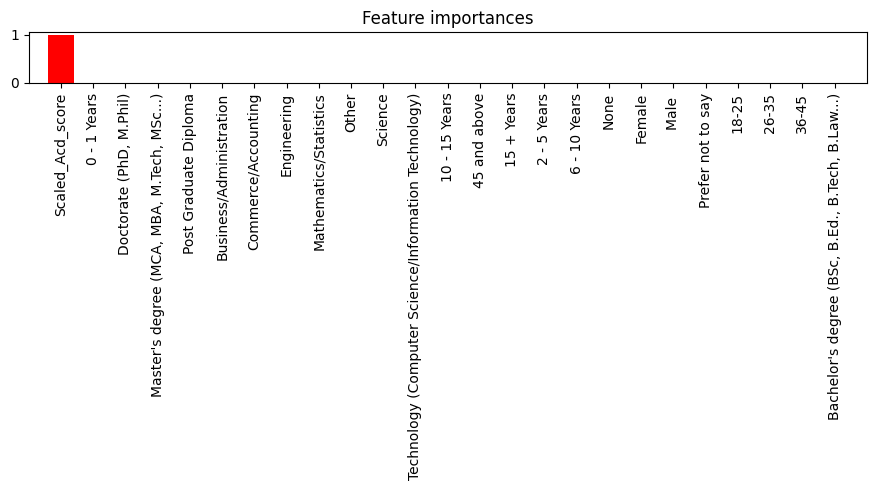

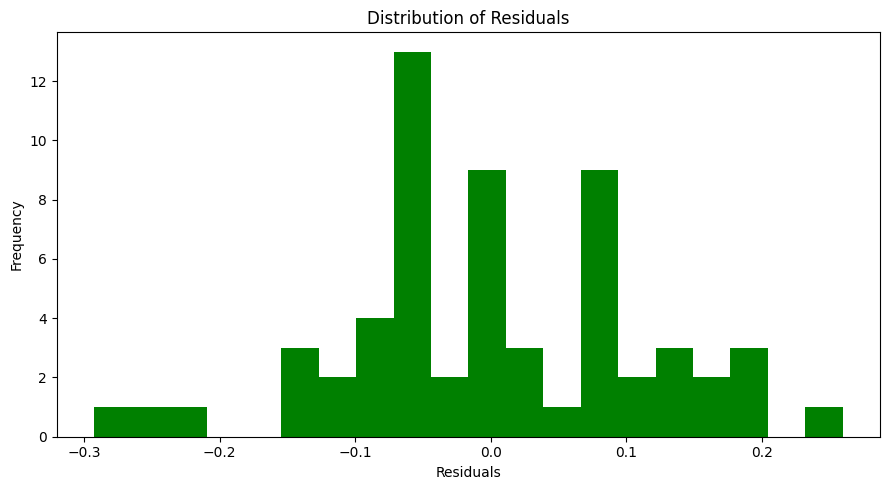

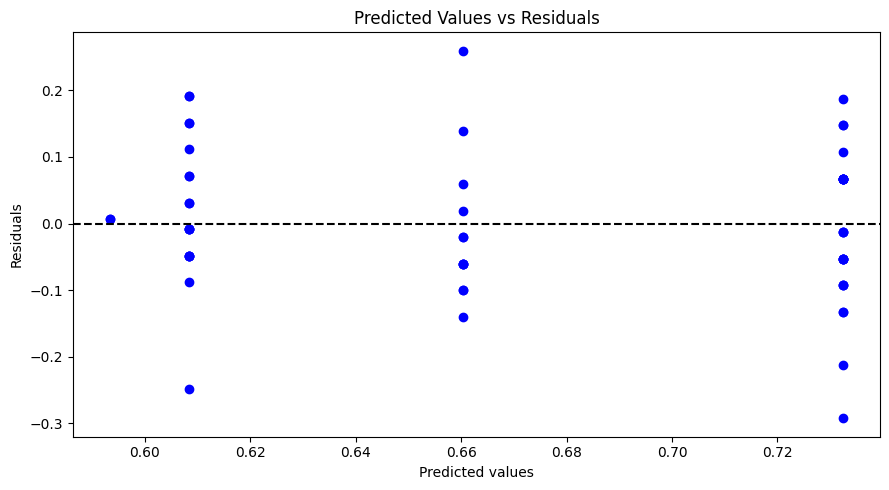

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)


# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")


# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_pred, color='b', label='Predicted values')
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], 'k--', label='Ideal line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.tight_layout()
plt.show()


print("==========================================================================================================================")
# Plot feature importance
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(9,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


print("==========================================================================================================================")
# Plot the distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=20, color='g')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()
print("==========================================================================================================================")
# Plot the predicted values against the residuals
plt.figure(figsize=(9,5))
plt.scatter(y_pred, residuals, color='b')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.tight_layout()
plt.show()
print("==========================================================================================================================")

## Support Vector Regressor

Best parameters: {'C': 1, 'gamma': 'scale'}
Best mean squared error: 0.02063
Mean squared error: 0.01687
Mean absolute error: 0.09918
R-squared score: -0.27443


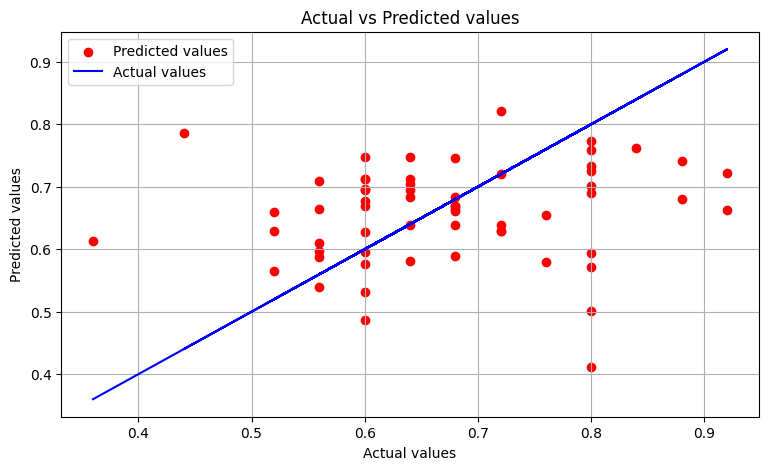

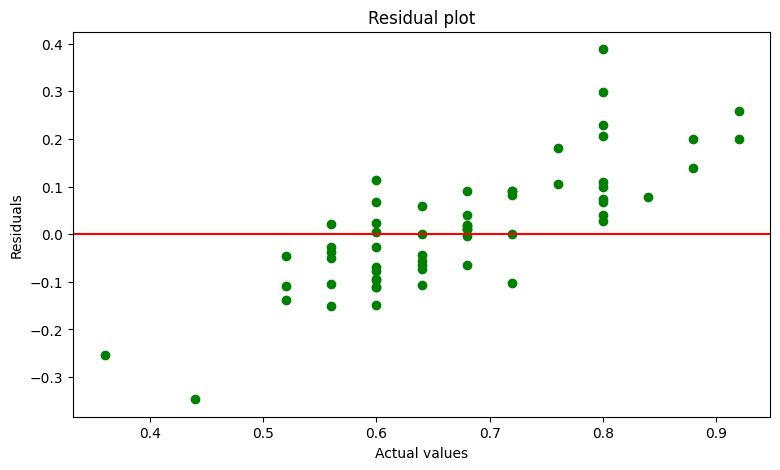

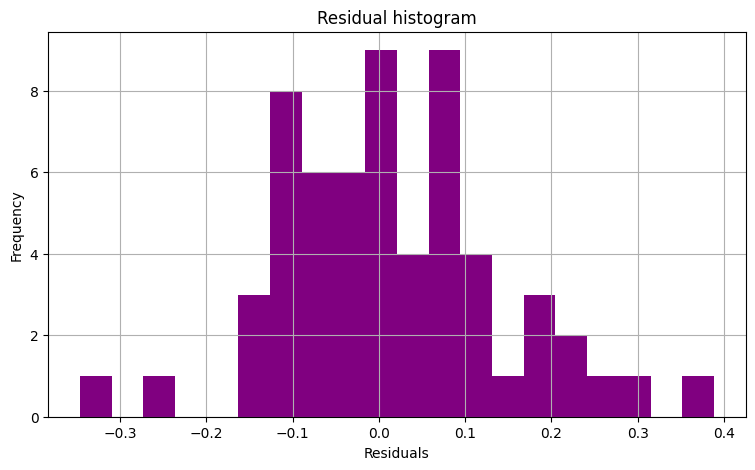

In [ ]:
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
param_grid = {
    'C': [0.01,0.1, 1, 10, 100],
    'gamma': [0.001,0.01, 0.1, 1, 'scale']
}
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)

# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")
# Plot the predicted values against the actual values
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(y_test, y_pred, c='red', label='Predicted values')
ax.plot(y_test, y_test, c='blue', label='Actual values')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.set_title('Actual vs Predicted values')
ax.legend()
ax.grid(True)
plt.show()
print("==========================================================================================================================")
# Plot the residuals
fig, ax = plt.subplots(figsize=(9,5))
residuals = y_test - y_pred
ax.scatter(y_test, residuals, c='green')
ax.axhline(y=0, color='red')
ax.set_xlabel('Actual values')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()
print("==========================================================================================================================")
# Plot a histogram of the residuals
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(residuals, bins=20, color='purple')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Residual histogram')
ax.grid(True)
plt.show()
print("==========================================================================================================================")

## Random Forest Regressor

Best hyperparameters: {'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 100}
Best negative mean squared error: 0.01937


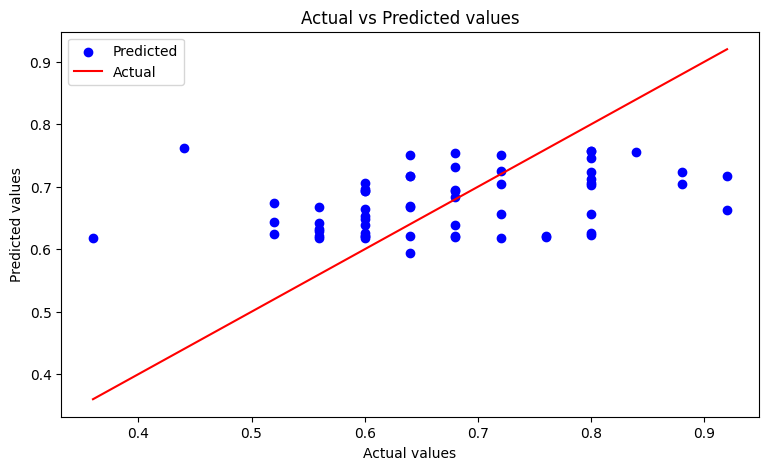

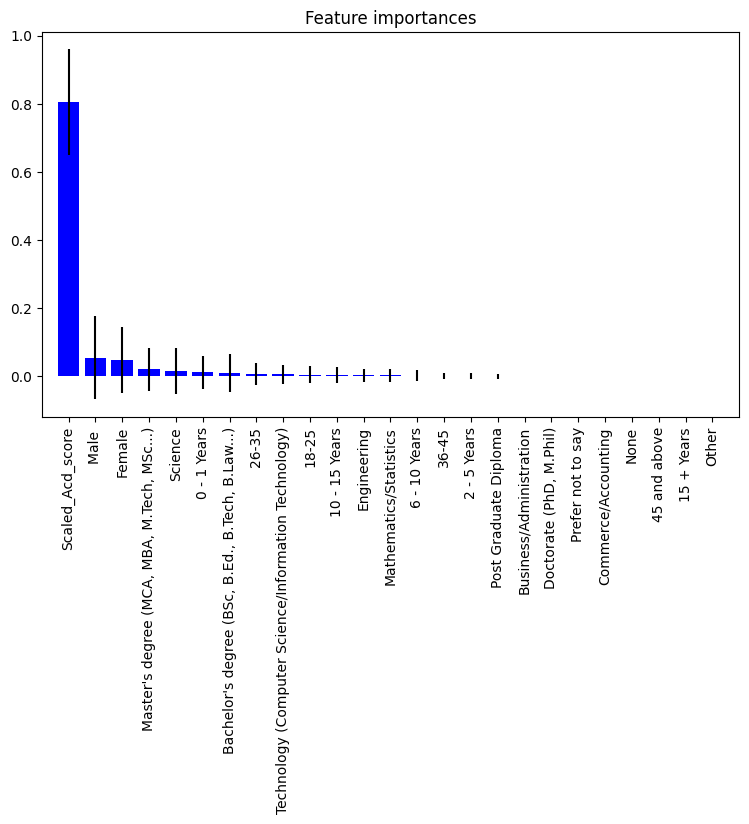

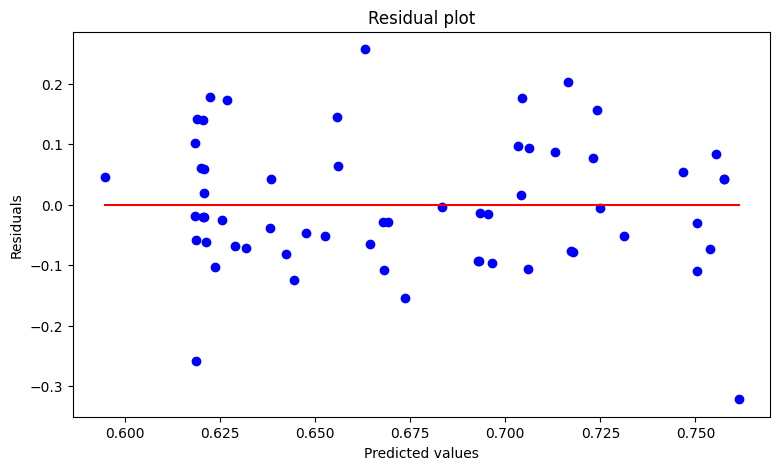

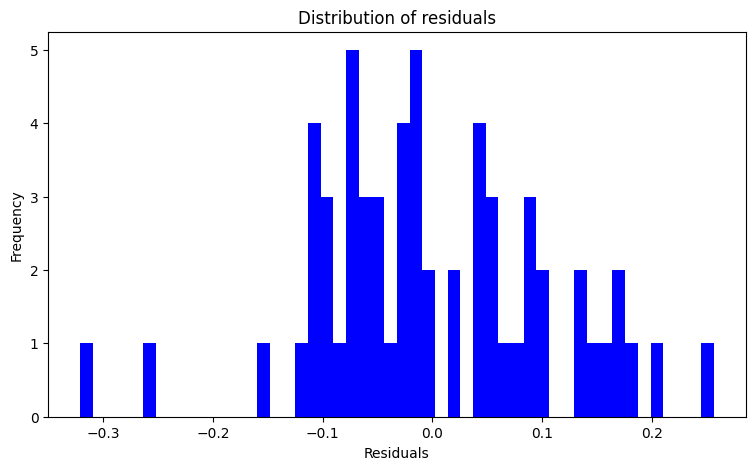

Mean squared error: 0.01161
Mean absolute error: 0.08592
R-squared score: 0.12290


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 250],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
rf_regressor = RandomForestRegressor()
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best hyperparameters: {}".format(grid_search.best_params_))
print("Best negative mean squared error: {:.5f}".format(-grid_search.best_score_))
y_predicted = grid_search.predict(X_test)

# Calculate the evaluation metrics between the predicted and actual target values
mean_squared_error_value = mean_squared_error(y_test, y_predicted)
mean_absolute_error_value = mean_absolute_error(y_test, y_predicted)
r2_score_value = r2_score(y_test, y_predicted)
print("==========================================================================================================================")
# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_predicted, color='b', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()
print("==========================================================================================================================")
# Plot feature importance
importances = grid_search.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in grid_search.best_estimator_.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(9,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()
print("==========================================================================================================================")
# Plot residuals
residuals = y_test - y_predicted
plt.figure(figsize=(9,5))
plt.scatter(y_predicted, residuals, color='b')
plt.plot([min(y_predicted), max(y_predicted)], [0, 0], color='r')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()
print("==========================================================================================================================")
# Plot distribution of residuals
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=50, color='b')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of residuals')
plt.show()
print("==========================================================================================================================")
print("Mean squared error: {:.5f}".format(mean_squared_error_value))
print("Mean absolute error: {:.5f}".format(mean_absolute_error_value))
print("R-squared score: {:.5f}".format(r2_score_value))


## Gradient Boosting Regressor

Best parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 50}
Best mean squared error: 0.02128
Mean squared error: 0.01276
Mean absolute error: 0.08732
R-squared score: 0.03626


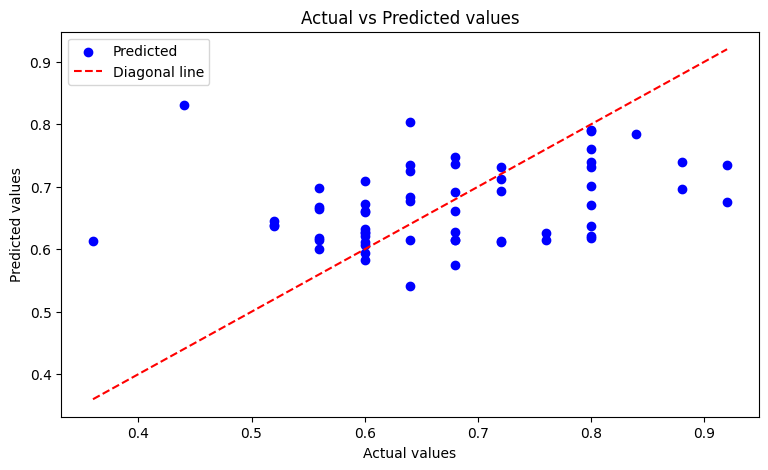

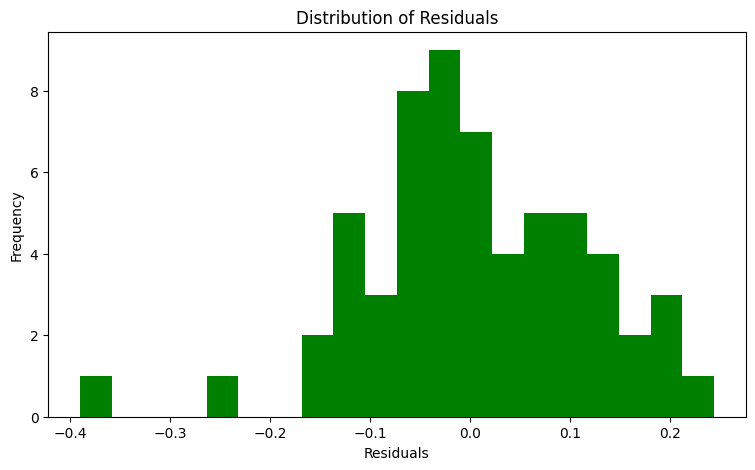

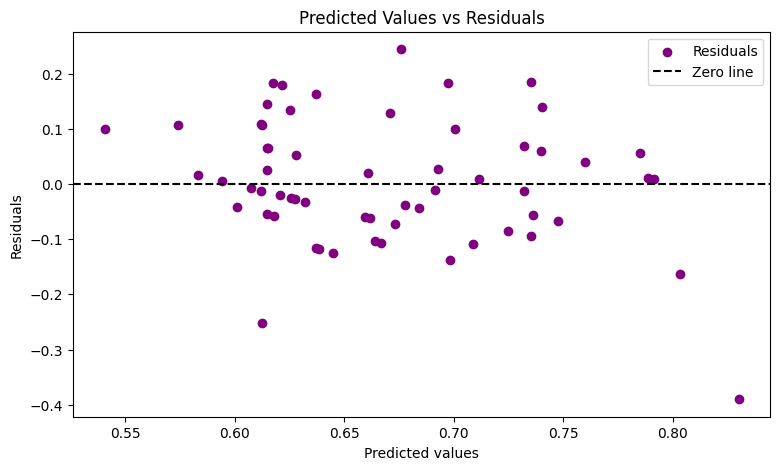

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
gb_reg = GradientBoostingRegressor()
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)

# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")
# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Diagonal line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()
print("==========================================================================================================================")
# Plot the distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=20, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()
print("==========================================================================================================================")
# Plot the predicted values against the residuals
plt.figure(figsize=(9,5))
plt.scatter(y_pred, residuals, color='purple', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero line')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.legend()
plt.show()
print("==========================================================================================================================")

## K-Neighbors Regressor

Best parameters: {'leaf_size': 1, 'n_neighbors': 23, 'weights': 'uniform'}
Best mean squared error: 0.02054
Mean squared error: 0.01160
R2 score: 0.12387


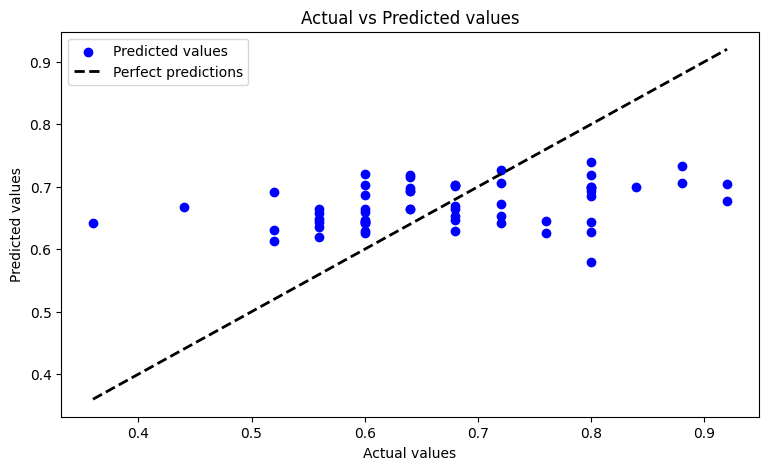

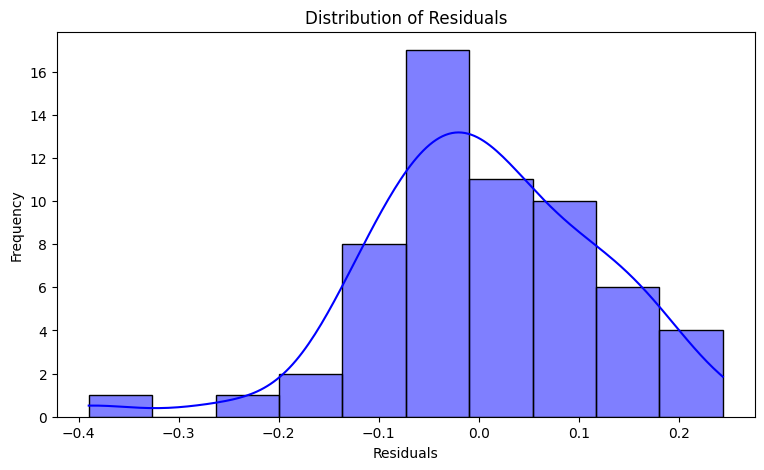

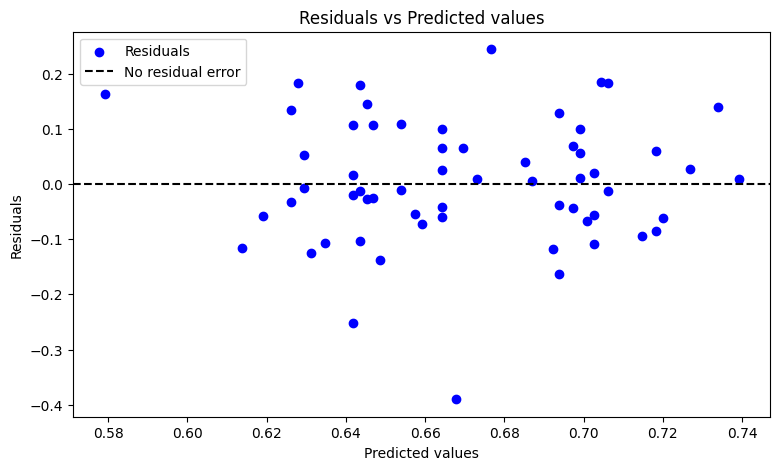

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
param_grid = {
    'n_neighbors': range(1, 50),
    'weights': ['uniform', 'distance'],
    'leaf_size': range(1,50)
}
knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("R2 score: {:.5f}".format(r2))
print("==========================================================================================================================")
# Plot the predicted values against the actual values
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(y_test, y_pred, color='blue', label='Predicted values')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.set_title('Actual vs Predicted values')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect predictions')
ax.legend()
plt.show()
print("==========================================================================================================================")
# Plot the distribution of the residuals
fig, ax = plt.subplots(figsize=(9,5))
sns.histplot(residuals, kde=True, color='blue')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Residuals')
plt.show()
print("==========================================================================================================================")
# Plot the residuals against the predicted values
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(y_pred, residuals, color='blue', label='Residuals')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Predicted values')
ax.axhline(y=0, color='k', linestyle='--', label='No residual error')
ax.legend()
plt.show()
print("==========================================================================================================================")